# SQLite database: fill in with the cleaned data and a star schema data mart

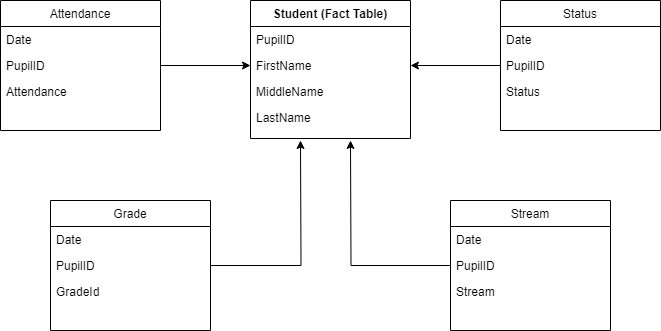

In [82]:
import pandas as pd
import sqlite3

In [85]:
print(pd.__version__)
print(sqlite3.sqlite_version)

1.3.2
3.35.5


___

In [2]:
df = pd.read_csv("../data/PupilData.csv")

In [33]:
df.head()

,SnapshotDate,AcademyName,PupilID,FirstName,MiddleName,LastName,Status,GradeId,GradeName,Stream
0,2018/11/20,Magamaga-MG,686858408,Sharif,NaN,Nabirye,Allowed In Class,2,Primary1,A
1,2018/11/20,Magamaga-MG,811038140,Kyalikisa,NaN,Difasi,Allowed In Class,4,Primary3,A
2,2018/11/20,Magamaga-MG,588990614,Mukisa,NaN,Samali,Allowed In Class,7,Primary6,a
3,2018/11/20,Magamaga-MG,131799371,Alikoba,NaN,Patience,Allowed In Class,8,Primary7,E
4,2018/11/20,Idudi-IC,251713657,Mubango,. Asumati,NaN,Not Allowed In Class,5,Primary4,A


___

In [19]:
dfFactTable = df[["PupilID", "FirstName", "MiddleName", "LastName"]].drop_duplicates()

In [31]:
dfFactTable.head(3)

,PupilID,FirstName,MiddleName,LastName
0,686858408,Sharif,NaN,Nabirye
1,811038140,Kyalikisa,NaN,Difasi
2,588990614,Mukisa,NaN,Samali


___

In [4]:
dfAttendance = pd.read_csv("../data/PupilAttendance.csv")

In [30]:
dfAttendance.head(3)

,Date,PupilID,Attendance
0,2018/11/20,686858408,Present
1,2018/11/20,811038140,Present
2,2018/11/20,588990614,Present


___

In [21]:
dfGrade = df[['SnapshotDate', 'PupilID', 'GradeId']]

In [29]:
dfGrade.head(3)

,SnapshotDate,PupilID,GradeId
0,2018/11/20,686858408,2
1,2018/11/20,811038140,4
2,2018/11/20,588990614,7


___

In [23]:
dfStream = df[['SnapshotDate', 'PupilID', 'Stream']]

In [28]:
dfStream.head(3)

,SnapshotDate,PupilID,Stream
0,2018/11/20,686858408,A
1,2018/11/20,811038140,A
2,2018/11/20,588990614,a


___

In [25]:
dfStatus = df[['SnapshotDate', 'PupilID', 'Status']]

In [27]:
dfStatus.head(3)

,SnapshotDate,PupilID,Status
0,2018/11/20,686858408,Allowed In Class
1,2018/11/20,811038140,Allowed In Class
2,2018/11/20,588990614,Allowed In Class


___

In [36]:
connection = sqlite3.connect('../db/newglobe.db')

In [37]:
cursor = connection.cursor()

Creating database with starschema

Save that as file and run it

In [70]:
with open('../db/tables.sql', 'r') as sql_file:
    sqlScript = sql_file.read()

In [71]:
cursor.executescript(sqlScript)

In [76]:
dfFactTable.to_sql('student', connection, if_exists='replace', index=False)
dfAttendance.to_sql('attendance', connection, if_exists='replace', index=False)
dfGrade.to_sql('grade', connection, if_exists='replace', index=False)
dfStream.to_sql('stream', connection, if_exists='replace', index=False)
dfStatus.to_sql('status', connection, if_exists='replace', index=False)

In [77]:
connection.commit()

Test it

In [81]:
cursor.execute("SELECT * FROM student LIMIT 20")

rows = cursor.fetchall()

for row in rows:
    print(row)

(686858408, 'Sharif', None, 'Nabirye')
(811038140, 'Kyalikisa', None, 'Difasi')
(588990614, 'Mukisa', None, 'Samali')
(131799371, 'Alikoba', None, 'Patience')
(251713657, 'Mubango', '. Asumati', None)
(626396063, 'Fatuma', '.', 'Tibesigwa')
(101125235, 'Akusigala', None, 'Eden')
(682596051, 'Nakito', None, 'Rashida')
(359416104, 'Naisanga', None, 'Noar')
(245758636, 'Sserunkuma', None, 'Cydric')
(393248851, 'Tresham', None, 'Ojambo')
(272262320, 'Ntalo', None, 'Mihashi')
(289770083, 'Mutegule', 'Jodan', 'Jodan')
(836415588, 'Elizabeth', None, 'Kirabo')
(633055884, 'Sumaya', None, 'Namukuve')
(994285864, 'Namunana', 'jalia', 'ALI')
(931602387, 'Munana', 'Bumali', 'Ali')
(616737490, 'Namukoma', 'Kauthara', 'Naigaga')
(601723612, 'Mulondo', None, 'Owen')
(680492295, 'Gloria', 'Babirye', 'Mbala')
